In [1]:
# REQUIREMENTS
#
# Installed pandas, altair, matplotlib
# pip install pandas
# pip install matplotlib
# pip install altair
#
# FILE STRUCTURE
#
# │   ergasia.ipynb
# │
# └───data
#     │
#     ├───Amsterdam
#     │       listings.csv
#     │
#     ├───Athens
#     │       listings.csv
#     │
#     ├───Barcelona
#     │       listings.csv
#     │
#     ├───Berlin
#     │       listings.csv
#     │
#     ├───Copenhagen
#     │       listings.csv
#     │
#     ├───Dublin
#     │       listings.csv
#     │
#     ├───Lisbon
#     │       listings.csv
#     │
#     ├───London
#     │       listings.csv
#     │
#     ├───Madrid
#     │       listings.csv
#     │
#     ├───Paris
#     │       listings.csv
#     │
#     ├───Rome
#     │       listings.csv
#     │
#     ├───Venice
#     │       listings.csv
#     │
#     └───Vienna
#             listings.csv


# AirBnB Listings

import pandas as pd # must have pandas installed

cities = [
    "Amsterdam",
    "Athens",
    "Barcelona",
    "Berlin",
    "Copenhagen",
    "Dublin",
    "Lisbon",
    "London",
    "Madrid",
    "Paris",
    "Rome",
    "Venice",
    "Vienna"
]

listing_dataframes = []
# Gather data for the cities listings
for city in cities:
    listing = pd.read_csv(f"data/{city}/listings.csv")
    # We can assume that every row is a listing
    rows= listing.shape[0]
    listing_dataframes.append({'City': city, 'Listings': rows})
    
tabular_format = pd.DataFrame(listing_dataframes)
tabular_format.style.hide(axis="index")


City,Listings
Amsterdam,9659
Athens,13274
Barcelona,19482
Berlin,13759
Copenhagen,20909
Dublin,6175
Lisbon,24204
London,96182
Madrid,26980
Paris,95461


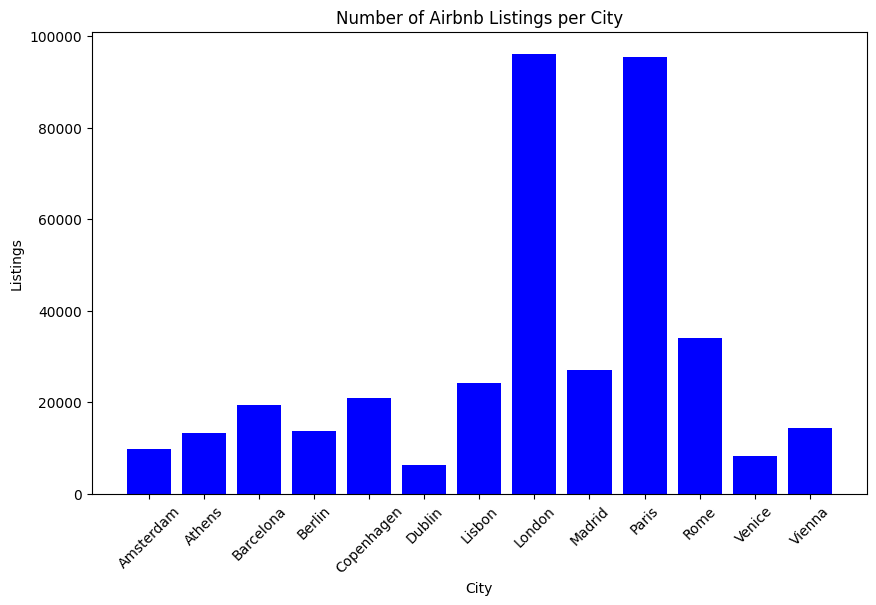

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(tabular_format['City'], tabular_format['Listings'], color='blue')
plt.title('Number of Airbnb Listings per City')
plt.xlabel('City')
plt.ylabel('Listings')
plt.xticks(rotation=45) 
plt.show()

In [3]:
# Density
# The data we have in insideairbnb represents the Propers City, population living within the administrative boundaries of a city.
# For example Athens, is dimos athinewn. These are not the same as urban population.
# Athens propers city inhabitans are ~ 600.000 while urban inhabitants are around over 3000000.
# From the data in insideairbnb we can see that the data are about the propers city boundaries, not urban.
# I downloaded the data from https://worldpopulationreview.com/cities/continent/europe
# the .csv didn't have Vienna so i added it

# This is the way i got the data from the .csv

# cities_inhabitants_csv = pd.read_csv(f"data/cities.csv")
# for dictionary in listing_dataframes:
#     city =  dictionary['City']
#     listings_number = dictionary['Listings'] 
#     if city == "Venice":
#         inhabitants = 254014
#     else :
#         city_data = cities_inhabitants_csv[(cities_inhabitants_csv['city'] == city) ]
#         inhabitants = city_data['population'].values[0]

# The data gathered from the csv are hardcoded here 

city_population = {"Amsterdam": 741636, "Athens": 664046, "Barcelona": 1621537, "Berlin": 3426354, "Copenhagen": 1153615, "Dublin": 1024027, "Lisbon": 517802, "London": 7556900, "Madrid": 3255944, "Paris": 2138551, "Rome": 2318895, "Venice": 254014, "Vienna": 1691468}

density_dataframes = []
# Listings per city Already found in previous step stored in listing_dataframes
for dictionary in listing_dataframes:
    city =  dictionary['City']
    listings_number = dictionary['Listings'] 
    inhabitants = city_population[city]
    density = listings_number / inhabitants
    density_per_1000_inhabitants = density * 1000
    density_dataframes.append({'City': city, 'Density': density_per_1000_inhabitants})
    
    
tabular_format_density = pd.DataFrame(density_dataframes)
tabular_format_density.style.hide(axis="index")


City,Density
Amsterdam,13.023909
Athens,19.989579
Barcelona,12.014527
Berlin,4.015639
Copenhagen,18.124764
Dublin,6.030114
Lisbon,46.743736
London,12.727706
Madrid,8.286383
Paris,44.638169


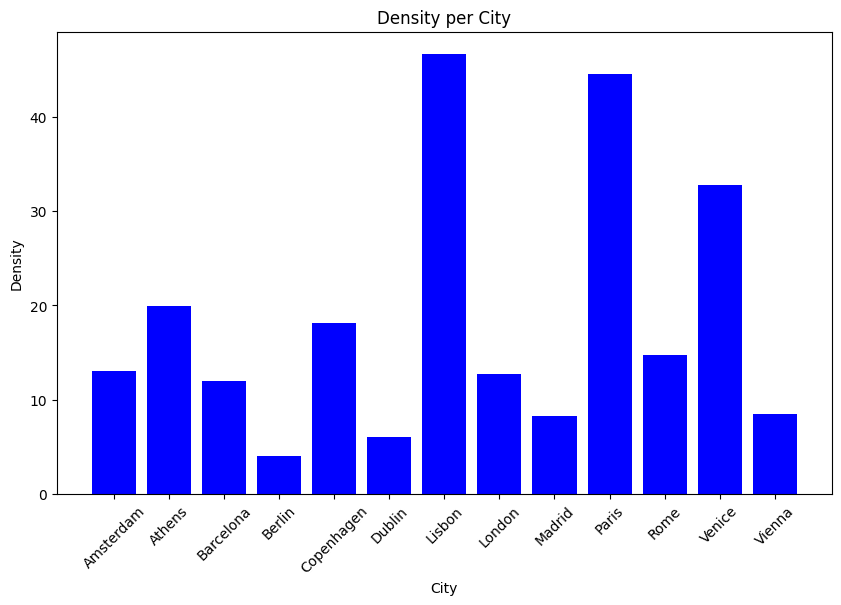

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(tabular_format_density['City'], tabular_format_density['Density'], color='blue')
plt.title('Density per City')
plt.xlabel('City')
plt.ylabel('Density')
plt.xticks(rotation=45) 
plt.show()

In [5]:
# Activity
activity_dictioary = {
    "city": [],
    "average_nights":[],
    "average_income": [],
    "total_bookings": []
}
# the reviews for the last 12 months are in the column number_of_reviews_ltm
for city in cities:
    
    # The assumed bookings nights would be number_of_reviews_ltm * 2 (only half booking have reviews) * 3 (nights a booking)
    # average number of nights a listing is booked =  all bookings nights / number of listings 
    listings = pd.read_csv(f"data/{city}/listings.csv")
    listings_number = listings.shape[0]
    
    sum_number_of_bookings = 0
    sum_number_of_booking_nights = 0
    overall_income = 0
    no_price_booked_nights = 0
    no_price_listings = 0

    listings['bookings_of_listing'] = listings['number_of_reviews_ltm'] * 2
    listings['bookings_of_listing_nights'] = listings['bookings_of_listing'] * 3

    listings['income'] = listings['bookings_of_listing_nights'] * listings['price']

    # Store the data for when price is missing to remove later
    no_price_listings = listings['income'].isna().sum()
    # filter the rows where income is nan and sum the bookings for them
    no_price_booked_nights = listings.loc[listings['income'].isna(), 'bookings_of_listing_nights'].sum()

    sum_number_of_bookings = listings['bookings_of_listing'].sum()
    sum_number_of_booking_nights = listings['bookings_of_listing_nights'].sum()

    # calculate income for listings with price
    overall_income = listings.loc[~listings['income'].isna(), 'income'].sum()
    
    average_nights_listing_booked =sum_number_of_booking_nights / listings_number
    average_income = overall_income / (listings_number - no_price_listings)
    activity_dictioary['city'].append(city)
    activity_dictioary['average_nights'].append(average_nights_listing_booked)
    activity_dictioary['average_income'].append(average_income)
    activity_dictioary['total_bookings'].append(sum_number_of_bookings)
                       
activity_df = pd.DataFrame( activity_dictioary)
activity_df.drop('total_bookings', axis=1).style.hide(axis="index")


city,average_nights,average_income
Amsterdam,56.225075,16506.873062
Athens,86.318819,8796.018825
Barcelona,71.434863,16964.680586
Berlin,53.600116,11798.788799
Copenhagen,30.588550,50349.852604
Dublin,85.344777,15502.200345
Lisbon,87.708478,13223.195780
London,34.545632,7016.020093
Madrid,84.971831,12642.420068
Paris,33.640942,8281.249416


In [6]:
# Cross Check
# total number of bookings and nights spent over the last 12 months period for each of the cities
# Not public data found
for city in cities:
    total_bookings = activity_df[activity_df['city'] == city]['total_bookings'].values[0]
    total_bookings_nights = total_bookings * 3 # That way we defined it
    print(city, total_bookings_nights, total_bookings)


Amsterdam 543078 181026
Athens 1145796 381932
Barcelona 1391694 463898
Berlin 737484 245828
Copenhagen 639576 213192
Dublin 527004 175668
Lisbon 2122896 707632
London 3322668 1107556
Madrid 2292540 764180
Paris 3211398 1070466
Rome 3022242 1007414
Venice 979302 326434
Vienna 997596 332532


In [7]:
# Room Type
import altair as alt

def roomTypeStats(city):
    df = pd.read_csv(f"data/{city}/listings.csv")
    room_type_stats = df['room_type'].value_counts().reset_index()
    room_type_stats.columns = ['room_type', 'listings']
    room_type_stats['city'] = city  # Add city name for identification later
    return room_type_stats

def visualiseRoomType(data, city_selection):
    room_type_color_scale = alt.Scale(
        domain=['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
        range=['#EC5242', '#3FB211', '#ADD8E6', '#FFD700']
    )

    chart = alt.Chart(data).mark_bar().encode(
        x=alt.X('listings:Q', axis=alt.Axis(values=[0, 5000, 10000])),
        y=alt.Y('room_type:N', sort=alt.EncodingSortField(field='listings', order='descending'),
                axis=alt.Axis(orient='right'), title=' '),
        color=alt.Color('room_type:N', scale=room_type_color_scale, legend=None),
        tooltip=['listings:Q']
    ).add_params(
        city_selection
    ).transform_filter(
        city_selection 
    ).properties(
        width=400,
        height=200,
        title="Room Type" 
    )
    
    return chart

def roomTypeCharts(city_selection):
    # gather all the data that will be filtered with dropdown selection
    all_data_roomtypes = pd.concat([roomTypeStats(city) for city in cities if city != "action"], ignore_index=True)
    return visualiseRoomType(all_data_roomtypes, city_selection)


In [8]:
# Activity

def getActivityStats(city):
    df = pd.read_csv(f"data/{city}/listings.csv")

    df['estimated_nights_booked'] = df['number_of_reviews_ltm'] * 2 * 3

    # Bins and Labels
    bins = [0, 1, 30, 60, 90, 120, 150, 180, 210, 240, float('inf')]
    labels = ['0', '1-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-255+']

    # send the nights into these bins
    df['nights_booked_bin'] = pd.cut(df['estimated_nights_booked'], bins=bins, labels=labels, right=False)

    # count the number of listings in each bin and make it dataframe
    nights_booked_counts = df['nights_booked_bin'].value_counts().sort_index().reset_index()
    nights_booked_counts['city'] = city # needed 
    return nights_booked_counts

def visualiseActivityStats(data, city_selection):
    return alt.Chart(data).mark_bar(size=40).encode(
    x=alt.X('index', title='occupancy (12 last months)', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('nights_booked_bin:Q', title='listings', axis=alt.Axis(values=[0, 1000, 2000, 3000])),
    tooltip=[alt.Tooltip('nights_booked_bin:Q', title=' ')]
    ).add_params(
        city_selection
    ).transform_filter(
        city_selection 
    ).properties(
        width=500,  # avoid bar overflow
        title="Activity"
    )

def getActivityCharts(city_selection):
    # gather all the data that will be filtered with dropdown selection
    all_data_activity = pd.concat([getActivityStats(city) for city in cities if city != "action"], ignore_index=True)
    return visualiseActivityStats(all_data_activity, city_selection)


In [9]:
# Liscenses

def getLiscencesStats(city):
    df = pd.read_csv(f"data/{city}/listings.csv")
    
    # function to categorize each license type
    def categorize_license(license):
        if pd.isnull(license) or license == ' ': 
            return 'unlicensed'
        elif license == 'Exempt':              
            return 'exempt'
        elif license == 'Pending':              
            return 'pending'
        else:
            return 'licensed'

    # create a new column
    df['license_type'] = df['license'].apply(categorize_license)

    # count occurrences of each type and make it dataframe
    room_type_stats = df['license_type'].value_counts().reset_index()
    room_type_stats.columns = ['liscence_type', 'listings'] 
    room_type_stats['city'] = city # needed 

    return room_type_stats

def visualiseLiscenceStats(data, city_selection):
    custom_ = {
        'licensed': '#1f77b4',  # Blue
        'unlicensed': '#ADD8E6',  # Light Blue
        'exempt': '#FFA500',  # Orange
        'pending': '#FFFF00'  # Yellow
    }
    license_color_scale = alt.Scale(domain=list(custom_.keys()), range=list(custom_.values()))

    return alt.Chart(data).mark_arc(innerRadius=80).encode(
        theta="listings:Q",
        color=alt.Color('liscence_type:N', 
                        scale=license_color_scale, 
                        title="",
                       legend=alt.Legend(title=" ")
                       ),
        tooltip=[alt.Tooltip('listings:Q', title=' ')]
    ).add_params(
        city_selection
    ).transform_filter(
        city_selection 
    ).properties(
        title="Licenses"
    )

def getLiscencesCharts(city_selection):
    # gather all the data that will be filtered with dropdown selection
    all_data_liscenses = pd.concat([getLiscencesStats(city) for city in cities if city != "action"], ignore_index=True)
    return visualiseLiscenceStats(all_data_liscenses, city_selection)


In [14]:
# Short-Term Rentals
def getShorTermRentalStats(city):
    df = pd.read_csv(f"data/{city}/listings.csv")
    
    # Custom categories
    def categorize_minimum_nights(nights):
        if nights >= 35:
            return "35+"
        else:
            return nights
        
    # apply the custom categories to create a new column
    df['minimum_nights_category'] = df['minimum_nights'].apply(categorize_minimum_nights)
    # create a new dataframe from the values of df minimum_nights_category
    min_nights_counts = df['minimum_nights_category'].value_counts().reset_index()
    min_nights_counts.columns = ['minimum_nights_category', 'listings']
    
    # New dataframe with the right labels
    all_values = pd.DataFrame({'minimum_nights_category': list(range(1,35)) + ['35+']})
    # Join (right) the empty  all_values dataframe with the min_nights_counts dataframe
    # fillna(0) for the X points wich bar == 0 to appear also
    min_nights_counts = min_nights_counts.merge(all_values, on='minimum_nights_category', how='right').fillna(0)
    min_nights_counts['city'] = city
    return min_nights_counts

def visualiseShortTermRentals(data, city_selection):
    # the main chart
    chart = alt.Chart(data).mark_bar(size=15).encode(
        x=alt.X('minimum_nights_category:N', 
                title='minimum nights',
                ),
         y=alt.Y(
            'listings:Q',
            title='Number of Listings',
            axis=alt.Axis(values=[0, 2000, 4000])  
        ),
        tooltip=[alt.Tooltip('listings:Q', title=' ')]
    ).add_params(
        city_selection
    ).transform_filter(
        city_selection 
    ).properties(
        title="Short-Term Rentals",
        width=600
    )
    # Create the dotted line
    rule = alt.Chart(pd.DataFrame({'x': [29]})).mark_rule(
        color='black',
        size=2,  
        strokeDash=[5, 5]  # dotted line 
    ).encode(
        x='x:O'
    )
    # Create the label STR Threshold
    label = alt.Chart(pd.DataFrame({'x': [28]})).mark_text(
        align='left', 
        baseline='middle',
        color='black', 
        fontSize=12,
        angle=90
    ).encode(
        x='x:O',
        text=alt.value('STR Threshold')  # the label text
    )
    # join all charts
    return chart + rule + label

def getShorTermRentalCharts(city_selection):
    # gather all the data that will be filtered with dropdown selection
    all_data_ShorTermRental = pd.concat([getShorTermRentalStats(city) for city in cities if city != "action"], ignore_index=True)
    return visualiseShortTermRentals(all_data_ShorTermRental,city_selection )


In [11]:
# listings per host
def getlistingsPerHost(city):
    df = pd.read_csv(f"data/{city}/listings.csv")

    # creates a Series having the listings per host
    listings_per_host = df['host_id'].value_counts()
    
    # Creating a dictionary containing the number of listins that are from hosts with the same listings number
    # 10+ for number of listings for host > 10
    dictionary = {}
    for host_id, listings in listings_per_host.items():
        listing_label = str(listings)
        if listings >= 10:
            listing_label = "10+"
        if listing_label not in dictionary:
            dictionary[listing_label] = 0
        dictionary[listing_label] += listings
        
    # Convert Dictionary to DataFrame
    d = pd.DataFrame.from_dict(dictionary, orient='index', columns=['listings'])
    d.index.name = 'listings_per_host'
    d = d.reset_index()
    d.columns = ['listings_per_host', 'listings']
    d['city'] = city
    return  d

def visualiseListingsPerHost(data, city_selection):
    custom_order = [ str(i) for i in range(1,10) ]
    custom_order.append("10+")
    chart = alt.Chart(data).mark_bar().encode(
        x=alt.X('listings_per_host:N', title='Listings per Host', scale=alt.Scale(domain=custom_order)),
        y=alt.Y(
            'listings:Q',
            axis=alt.Axis(values=[0, 2000, 4000])  
        ),
        tooltip=[alt.Tooltip('listings:Q', title=' ')]
    ).add_params(
        city_selection
    ).transform_filter(
        city_selection 
    ).properties(
        width=500,
        title="Listings per Host"
    )
    return chart

def getlistingsPerHostCharts(city_selection):
    # gather all the data that will be filtered with dropdown selection
    all_data_listings_per_host = pd.concat([getlistingsPerHost(city) for city in cities if city != "action"], ignore_index=True)
    return visualiseListingsPerHost(all_data_listings_per_host, city_selection)



In [12]:
import pandas as pd
import altair as alt
from IPython.display import display

def getTopHost(city):
    df = pd.read_csv(f"data/{city}/listings.csv")

    host_id_name_table = df[['host_id', 'host_name']]  # table with host_id - name of host
    host_id_name_table = host_id_name_table.drop_duplicates()  # remove duplicates
    
    # number of listings per host
    listings_per_host = df['host_id'].value_counts()    

    # types of rooms for each host
    room_type_counts = df.groupby('host_id')['room_type'].value_counts().unstack(fill_value=0)  # separate columns for room type

    # combine both counts into a single DataFrame for each host
    host_stats = listings_per_host.to_frame('listings').join(room_type_counts)
    host_stats = host_stats.reset_index()  # make it dataframe 
    
    # combine names with host stats on host id
    host_stats_with_names = host_id_name_table.join(host_stats.set_index('index'), on='host_id')
    host_stats_with_names = host_stats_with_names.sort_values(by="listings", ascending=False)
    host_stats_with_names['city'] = city
    return host_stats_with_names


In [15]:
from IPython.display import display, HTML, clear_output
def_city = "Athens"


print("Wait to Load")

if "action" not in cities: cities.append("action")

# the dropdown
city_selection = alt.selection_point(
    fields=['city'],
    bind=alt.binding_select(options=cities, name="Filter by: "),
    value='action'  # Default city
)

# All charts
chart_room_type = roomTypeCharts(city_selection)
chart_Activity = getActivityCharts(city_selection)
chart_listings_per_host = getlistingsPerHostCharts(city_selection)
chart_liscences = getLiscencesCharts(city_selection)
chart_ShorTermRental = getShorTermRentalCharts(city_selection)
# the tabular data
top_hosts = getTopHost(def_city)

final_chart = alt.vconcat(
    chart_room_type, 
    chart_Activity, 
    chart_liscences, 
    chart_ShorTermRental, 
    chart_listings_per_host
).resolve_scale(
    color='independent' 
)

# CSS to position the filter on top
display(HTML("""
<style>
form.vega-bindings {
  position: absolute;
  left: 65px;
  top: -30px;
}
.vega-embed {
  margin-top: 30px;  /* Adjust this to add space above the chart */
}
</style>
"""))
display(final_chart)

display(top_hosts[:50].drop('host_id', axis=1) \
    .rename(columns={'host_name': 'Host Name'}) \
    .style \
    .set_properties(**{'text-align': 'center'}) \
    .set_properties(subset=['Host Name'], **{'text-align': 'left', 'font-weight': 'bold'}) \
    .hide(axis="index"))

Wait to Load


alt.VConcatChart(...)

Host Name,listings,Entire home/apt,Hotel room,Private room,Shared room,city
Upstreet,109,109,0,0,0,Athens
Mgv,98,98,0,0,0,Athens
Sarn,94,94,0,0,0,Athens
Evan&Anetta,88,88,0,0,0,Athens
Harry,72,72,0,0,0,Athens
Maryland,63,63,0,0,0,Athens
George,61,61,0,0,0,Athens
Homer & Isabella,58,58,0,0,0,Athens
Raise Team,58,53,5,0,0,Athens
Dropebnb,51,51,0,0,0,Athens
